#O teste $X^2$ de Bartlett



É necessário garantir que as amostras serão normais e seguirão a qui-quadrada.

Além disso, ele só será usado para 3 ou mais grupos.


Devemos definir a hipótese a ser testada sobre o parâmetro k dessa população, que é chamada de hipótese nula:

(as variâncias dos erros são homogêneas)
$$H_0 : \sigma^2_1 = \sigma^2_2 = \sigma^2_3 = \sigma^2_k$$

Definiremos também a hipótese alternativa $(H_1)$: existem pelo menos um i e um j tais que:

(as variâncias dos erros não são homogêneas)
$$H_1 :\sigma^2_i \neq \sigma^2_j $$


A Bcalc (estatística de Bortlett) é dado por:

$$Bcalc = \frac{q}{c} ~~com~~distribuição~~ X^2_{k-1+\alpha}$$



Regra de Decisão:

$Bcalc > X^2_{c},$ rejeitamos $H_{0}$

$Bcalc <= X^2_{c},$ aceitamos $H_{0}$

Se $p <= \alpha,$ rejeitamos $H_{0}$

Sendo:

$S^2_{i}$ = Variância de cada amostra

$n_{i}$ variando para i = 1, ..., k

$S^2_{p} = \frac{\sum^k_{i=1}(n_{i}-1)S^2_{i}}{N-k}$

$N = \sum^k_{i=1} ni$

o fator de correção aplicado a q: $c = 1 + \frac{1}{3(k-1)}(\sum^k_{i=1}(\frac{1}{n_{i}-1}) - \frac{1}{N-k})$

A estatística de Teste: $ q = \frac{(N - k) log_{e}(S^2_{p}) - \sum^k_{i=1}(n_{i}-1)ln(S^2_{i})}{c}$

$p = $ menor nível de confiança

In [55]:
# @title Bibliotecas
import scipy
import scipy.stats as stats
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

#Problema dos CRA's

    Supondo que somos um grupo de pesquisadores e coletamos dados dos três diferentes cursos de computação do Centro de Informática da UFPB.
    Queremos saber se a variância entre os CRA dos alunos de cada curso varia significativamente.


$H0~(Hipótese~Nula):~A~variância~do~CRA~dos~alunos~é~a~mesma~para~todos~os~três~cursos.$

    Isso significa que não há diferença significativa na variabilidade do CRA entre os alunos dos diferentes cursos.


$H1~(Hipótese~Alternativa):~Pelo~menos~um~dos~cursos~tem~uma~variância~de~CRA~que~é~diferente~dos~outros.$

    Isso significa que há uma diferença significativa na variabilidade do CRA entre os alunos de pelo menos dois cursos.

##Amostras

In [43]:
#gerando CRAs ficticios para cada curso

#num de cursos considerados
k = 3
#num de alunos de cada curso considerados
num_alunos = 500

cra = {}
for curso, media, desvio_padrao in [('CC', 5, 1), ('CDIA', 7, 1), ('ENG', 6, 1.5)]:
    cra[curso] = np.random.normal(loc=media, scale=desvio_padrao, size=num_alunos)
    cra[curso] = np.clip(cra[curso], 0, 10)  #limitando os valores ao intervalo [0, 10] por ser sobre o CRA

In [44]:
#teste de ks apresentado anteriormente
def analisar_amostra(limite_inferior, limite_superior, tamanho_amostra, probabilidades, amostra):
    df = pd.Series(amostra).value_counts().reset_index()
    #valor e freq abs
    df.columns = ['X_i', 'F_abs']
    df = df.sort_values(by='X_i').reset_index(drop=True)

    #frequência acumulada
    df['F_ac'] = df['F_abs'].cumsum()
    #frequência relativa
    df['F_r'] = df['F_abs'] / tamanho_amostra
    #frequência acumulada observada
    df['F_obs'] = df['F_r'].cumsum()

    media = np.mean(amostra)
    desvio = np.std(amostra)
    erro_padrao = desvio / np.sqrt(len(amostra))
    min_val = np.min(amostra)
    max_val = np.max(amostra)
    soma = sum(amostra)
    count = len(amostra)
    variancia = np.var(amostra)

    df['Z-score'] = (df['X_i'] - media) / desvio
    df['F_esp'] = norm.cdf(df['Z-score'])
    df['|F_esp(X_i)-F_obs(X_i)|'] = abs(df['F_esp'] - df['F_obs'])
    df['|F_esp(X_i)-F_obs(X_{i-1})|'] = abs(df['F_esp'] - df['F_obs'].shift(fill_value=0))

    max_Fesp_Fobs = df['|F_esp(X_i)-F_obs(X_i)|'].max()
    max_Fesp_Fobs1 = df['|F_esp(X_i)-F_obs(X_{i-1})|'].max()
    listaMax = [max_Fesp_Fobs, max_Fesp_Fobs1]
    Dcalc = np.max(listaMax)

    Dc = 1.36 / np.sqrt(tamanho_amostra)

    if Dcalc < Dc:
        hipotese = "Aceita. A distribuição é normal"
    else:
        hipotese = "Rejeitada. A distribuição é não-normal"

    return {
        'media': media,
        'erro_padrao': erro_padrao,
        'desvio_padrao': desvio,
        'variancia': variancia,
        'minimo': min_val,
        'maximo': max_val,
        'soma': soma,
        'contagem': count,
        'Dcalc': Dcalc,
        'Dc': Dc,
        'hipotese': hipotese,
        'amostra': amostra
    }

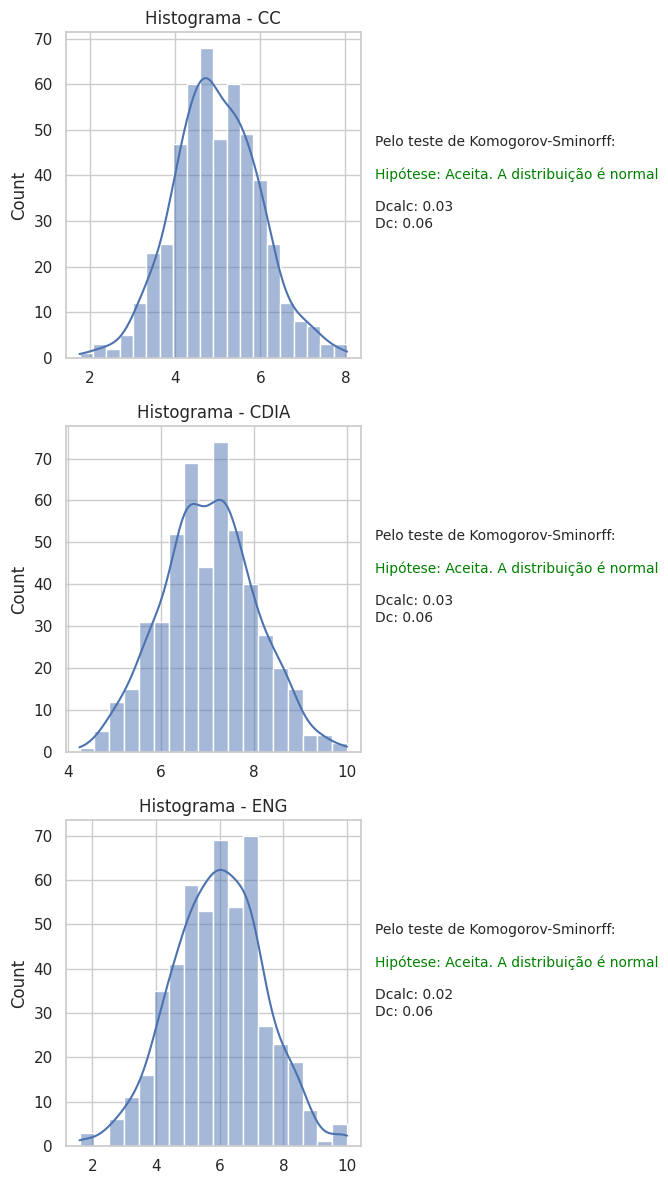

In [56]:
def plotagem(data, title, row):
    sns.set(style="whitegrid")
    ax1 = plt.subplot(3, 2, 2*row-1)
    sns.histplot(data, bins='auto', kde=True, ax=ax1)
    ax1.set_title(f"Histograma - {title}")

    #usando ks
    analise = analisar_amostra(0, 10, len(data), None, data)

    #texto lateral
    ax1.text(1.05, 0.6, f"Pelo teste de Komogorov-Sminorff:\n", fontsize=10, transform=ax1.transAxes)
    ax1.text(1.05, 0.5, f"Hipótese: {analise['hipotese']}\n", fontsize=10, transform=ax1.transAxes, color='green' if analise['hipotese'].startswith('Aceita') else 'red')
    ax1.text(1.05, 0.4, f"Dcalc: {analise['Dcalc']:.2f}\nDc: {analise['Dc']:.2f}", fontsize=10, transform=ax1.transAxes)

plt.figure(figsize=(10, 12))

for i, curso in enumerate(cra, 1):
    plotagem(cra[curso], curso, i)

plt.tight_layout()
plt.show()


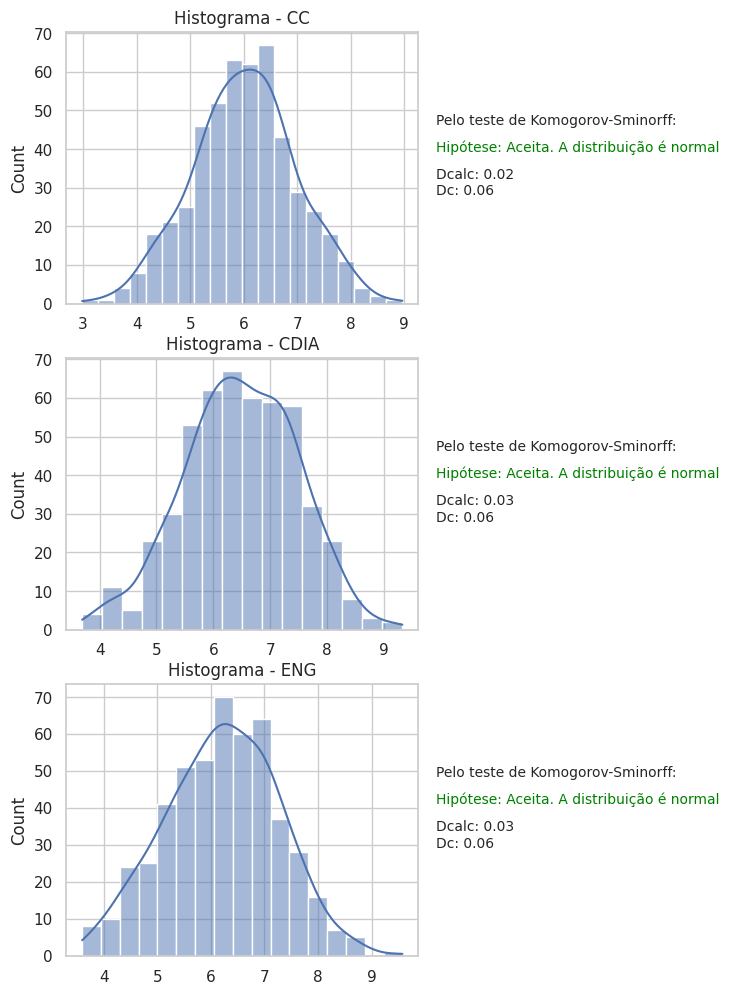

In [57]:
cra2 = {}
for curso, media, desvio_padrao in [('CC', 6, 1), ('CDIA', 6.5, 1), ('ENG', 6.2, 1)]:
    cra2[curso] = np.random.normal(loc=media, scale=desvio_padrao, size=num_alunos)
    cra2[curso] = np.clip(cra2[curso], 0, 10)

plt.figure(figsize=(10, 12))

for i, curso in enumerate(cra2, 1):
    plotagem(cra2[curso], curso, i)

plt.show()

##Bcalc

##CRA 1

In [47]:
# @title CRA 1
num_variaveis1 = len(cra['CC'])
num_variaveis2 = len(cra['CDIA'])
num_variaveis3 = len(cra['ENG'])

n_i = num_variaveis1 + num_variaveis2 + num_variaveis3
print("Numero total de Amostras: ", n_i)

media1 = sum(cra['CC'])/num_variaveis1
media2 = sum(cra['CDIA'])/num_variaveis2
media3 = sum(cra['ENG'])/num_variaveis3

#soma do quadrado das diferenças
soma_qua_dif1 = sum((x - media1)**2 for x in cra['CC'])
soma_qua_dif2 = sum((x - media2)**2 for x in cra['CDIA'])
soma_qua_dif3 = sum((x - media3)**2 for x in cra['ENG'])

#variancia amostral
variancia1 = soma_qua_dif1 / (num_variaveis1-1)
variancia2 = soma_qua_dif2 / (num_variaveis2-1)
variancia3 = soma_qua_dif3 / (num_variaveis3-1)

#log da variancia
resultado = np.log(variancia1)
resultado2 = np.log(variancia2)
resultado3 = np.log(variancia3)

#grau de liberdade
grau_lib = num_variaveis1-1
grau_lib2 = num_variaveis2-1
grau_lib3 = num_variaveis3-1

#s_p^2
s_p2 = grau_lib*variancia1
s_p2_2 = grau_lib*variancia2
s_p2_3 = grau_lib*variancia3

#variancia agrupada
var_agrup = (s_p2 + s_p2_2 + s_p2_3)/(n_i - k)

#bcalc
q = (n_i - k) * np.log(var_agrup) - (len(cra['CC']) - 1) * np.log(variancia1) - (len(cra['CDIA']) - 1) * np.log(variancia2) - (len(cra['ENG']) - 1) * np.log(variancia3)
c = 1 + 1/(3*(k-1)) * ((1/(len(cra['CC']) - 1) + 1/(len(cra['CDIA']) - 1) + 1/(len(cra['ENG']) - 1)) - 1/(n_i - k))
bcalc = q / c

#p-value
p = stats.chi2.sf(bcalc, k - 1)

print(f"Estatística Bartlett (Bcalc): {bcalc}, Valor-p: {p}")

#usando alpha como 0.05
if p <= 0.05:
    print("\nAceitamos H0. A variância do CRA dos alunos é a mesma para todos os três cursos")
else:
    print("\nRejeitamos H0. A variância do CRA dos alunos é diferente em pelo menos dois cursos")

Numero total de Amostras:  1500
Estatística Bartlett (Bcalc): 85.79412351007267, Valor-p: 2.3444597975691393e-19

Rejeitamos H0. A variância do CRA dos alunos é diferente em pelo menos dois cursos


In [48]:
#@title Tabela CRA 1
data = {
    'CC': cra['CC'],
    'CDIA': cra['CDIA'],
    'ENG': cra['ENG']
}

df = pd.DataFrame(data)

desvio_padrao= df.std()
variancias = df.var()
tam_amostra = df.count()

df.loc['Desvio-padrão'] = desvio_padrao
df.loc['Variância'] = variancias
df.loc['Tamanho da amostra'] = tam_amostra

print("\nTabela de CRA por Cursos:\n")
print(df)


Tabela de CRA por Cursos:

                            CC        CDIA         ENG
0                     4.702243    7.371820    6.896989
1                     5.836154    7.873988    6.641165
2                     5.563229    8.324288    4.634025
3                     5.312388    9.400909    5.631154
4                     6.154984    6.609062    6.903470
...                        ...         ...         ...
498                   6.300199    5.323599    8.310190
499                   4.415990    8.422070    5.949033
Desvio-padrão         1.004323    0.998445    1.419217
Variância             1.008664    0.996892    2.014178
Tamanho da amostra  500.000000  500.000000  500.000000

[503 rows x 3 columns]


In [49]:
# @title Teste automático

statistic, p_value = stats.bartlett(cra['CC'], cra['CDIA'], cra['ENG'])

print("Estatística do Teste de Bartlett:", statistic)
print("Valor-p (p-value):", p_value)

if p_value <= 0.05:
    print("H0 foi rejeitada. As variâncias das amostras não são iguais.")
else:
    print("H0 não foi rejeitada. As variâncias das amostras podem ser consideradas iguais.")


Estatística do Teste de Bartlett: 85.79412351007255
Valor-p (p-value): 2.344459797569276e-19
H0 foi rejeitada. As variâncias das amostras não são iguais.


##CRA 2

In [50]:
num_variaveis1 = len(cra2['CC'])
num_variaveis2 = len(cra2['CDIA'])
num_variaveis3 = len(cra2['ENG'])

n_i = num_variaveis1 + num_variaveis2 + num_variaveis3
print("Numero total de Amostras: ", n_i)

media1 = sum(cra2['CC'])/num_variaveis1
media2 = sum(cra2['CDIA'])/num_variaveis2
media3 = sum(cra2['ENG'])/num_variaveis3

#soma do quadrado das diferenças
soma_qua_dif1 = sum((x - media1)**2 for x in cra2['CC'])
soma_qua_dif2 = sum((x - media2)**2 for x in cra2['CDIA'])
soma_qua_dif3 = sum((x - media3)**2 for x in cra2['ENG'])

#variancia amostral
variancia1 = soma_qua_dif1 / (num_variaveis1-1)
variancia2 = soma_qua_dif2 / (num_variaveis2-1)
variancia3 = soma_qua_dif3 / (num_variaveis3-1)

#log da variancia
resultado = np.log(variancia1)
resultado2 = np.log(variancia2)
resultado3 = np.log(variancia3)

#grau de liberdade
grau_lib = num_variaveis1-1
grau_lib2 = num_variaveis2-1
grau_lib3 = num_variaveis3-1

#s_p^2
s_p2 = grau_lib*variancia1
s_p2_2 = grau_lib*variancia2
s_p2_3 = grau_lib*variancia3

#variancia agrupada
var_agrup = (s_p2 + s_p2_2 + s_p2_3)/(n_i - k)

#bcalc
q = (n_i - k) * np.log(var_agrup) - (len(cra2['CC']) - 1) * np.log(variancia1) - (len(cra2['CDIA']) - 1) * np.log(variancia2) - (len(cra2['ENG']) - 1) * np.log(variancia3)
c = 1 + 1/(3*(k-1)) * ((1/(len(cra2['CC']) - 1) + 1/(len(cra2['CDIA']) - 1) + 1/(len(cra2['ENG']) - 1)) - 1/(n_i - k))
bcalc2 = q / c

#p-value
p2 = stats.chi2.sf(bcalc2, k - 1)

print(f"Estatística Bartlett (Bcalc): {bcalc2}, Valor-p: {p2}")

#usando alpha como 0.05
if p <= 0.05:
    print("\nAceitamos H0. A variância do CRA2 dos alunos é a mesma para todos os três cursos")
else:
    print("\nRejeitamos H0. A variância do CRA2 dos alunos é diferente em pelo menos dois cursos")

Numero total de Amostras:  1500
Estatística Bartlett (Bcalc): 0.8376384708302713, Valor-p: 0.6578230956398023

Rejeitamos H0. A variância do CRA2 dos alunos é diferente em pelo menos dois cursos


In [51]:
#@title Tabela CRA 2

data = {
    'CC': cra2['CC'],
    'CDIA': cra2['CDIA'],
    'ENG': cra2['ENG']
}

df = pd.DataFrame(data)

desvio_padrao= df.std()
variancias = df.var()
tam_amostra = df.count()

df.loc['Desvio-padrão'] = desvio_padrao
df.loc['Variância'] = variancias
df.loc['Tamanho da amostra'] = tam_amostra

print("\nTabela de CRA 2 por Cursos:\n")
print(df)


Tabela de CRA 2 por Cursos:

                            CC        CDIA         ENG
0                     5.577726    7.926736    6.670043
1                     6.496973    8.447466    6.390768
2                     4.795062    5.198468    7.693630
3                     4.764475    5.253078    5.267760
4                     5.290003    6.773598    3.790863
...                        ...         ...         ...
498                   3.740522    4.887980    5.296776
499                   5.477558    7.480681    7.121840
Desvio-padrão         1.001569    0.993373    1.032644
Variância             1.003140    0.986791    1.066354
Tamanho da amostra  500.000000  500.000000  500.000000

[503 rows x 3 columns]


In [52]:
# @title Teste automático

statistic2, p_value2 = stats.bartlett(cra2['CC'], cra2['CDIA'], cra2['ENG'])

print("Estatística do Teste de Bartlett:", statistic2)
print("Valor-p (p-value):", p_value2)

if p_value <= 0.05:
    print("H0 foi rejeitada. As variâncias das amostras não são iguais.")
else:
    print("H0 não foi rejeitada. As variâncias das amostras podem ser consideradas iguais.")


Estatística do Teste de Bartlett: 0.8376384708300584
Valor-p (p-value): 0.6578230956398724
H0 foi rejeitada. As variâncias das amostras não são iguais.


##tabela

In [53]:
data = {
    'Método': ['Automatico p/ 1', 'CRA 1', 'Automatico p/ 2', 'CRA 2'],
    'Estatística': [statistic, bcalc, statistic2, bcalc2],
    'Valor-p': [p_value, p, p_value2, p2]
}

df = pd.DataFrame(data)
df

,Método,Estatística,Valor-p
0,Automatico p/ 1,85.794124,2.344460e-19
1,CRA 1,85.794124,2.344460e-19
2,Automatico p/ 2,0.837638,6.578231e-01
3,CRA 2,0.837638,6.578231e-01
